In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

# Load the dataset
df = pd.read_csv("C:\creditcard.csv")

# Check for missing values
print(df.isnull().sum())

# Basic Summary Statistics
print(df.describe())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027

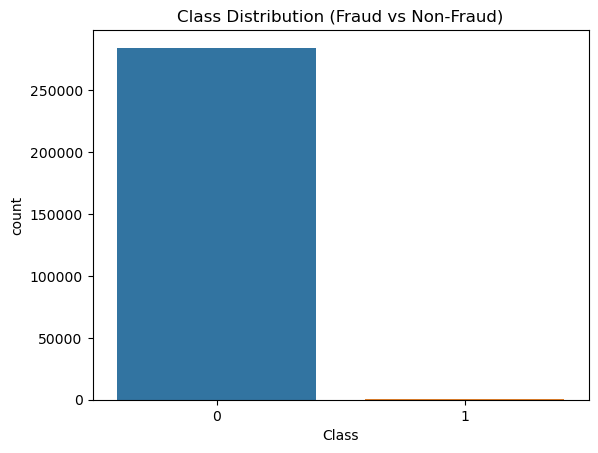

In [2]:
# Plotting class distribution (fraud vs non-fraud)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.show()

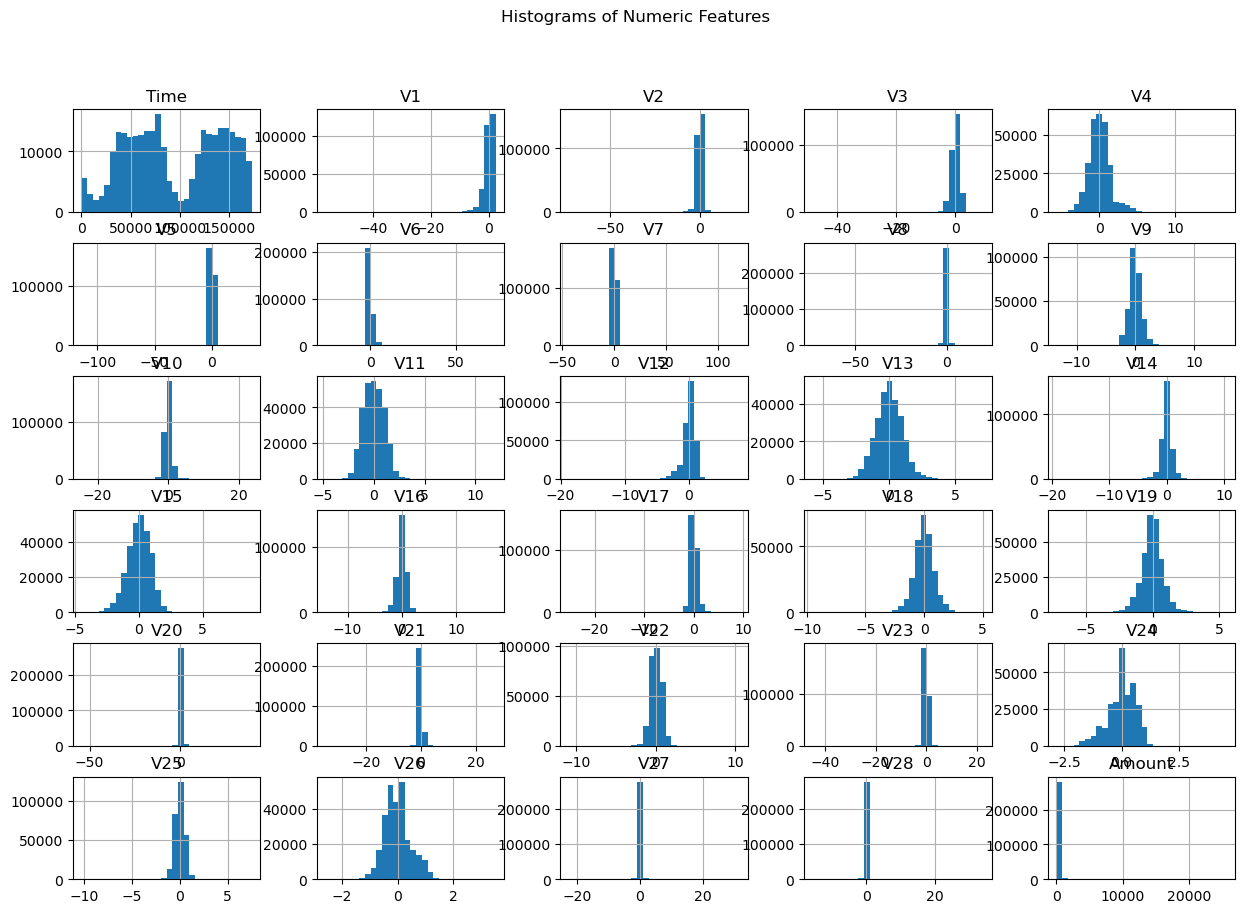

In [3]:
# Plot distributions of numeric features
numerical_features = df.drop(['Class'], axis=1).select_dtypes(include=[np.number]).columns
df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numeric Features')
plt.show()

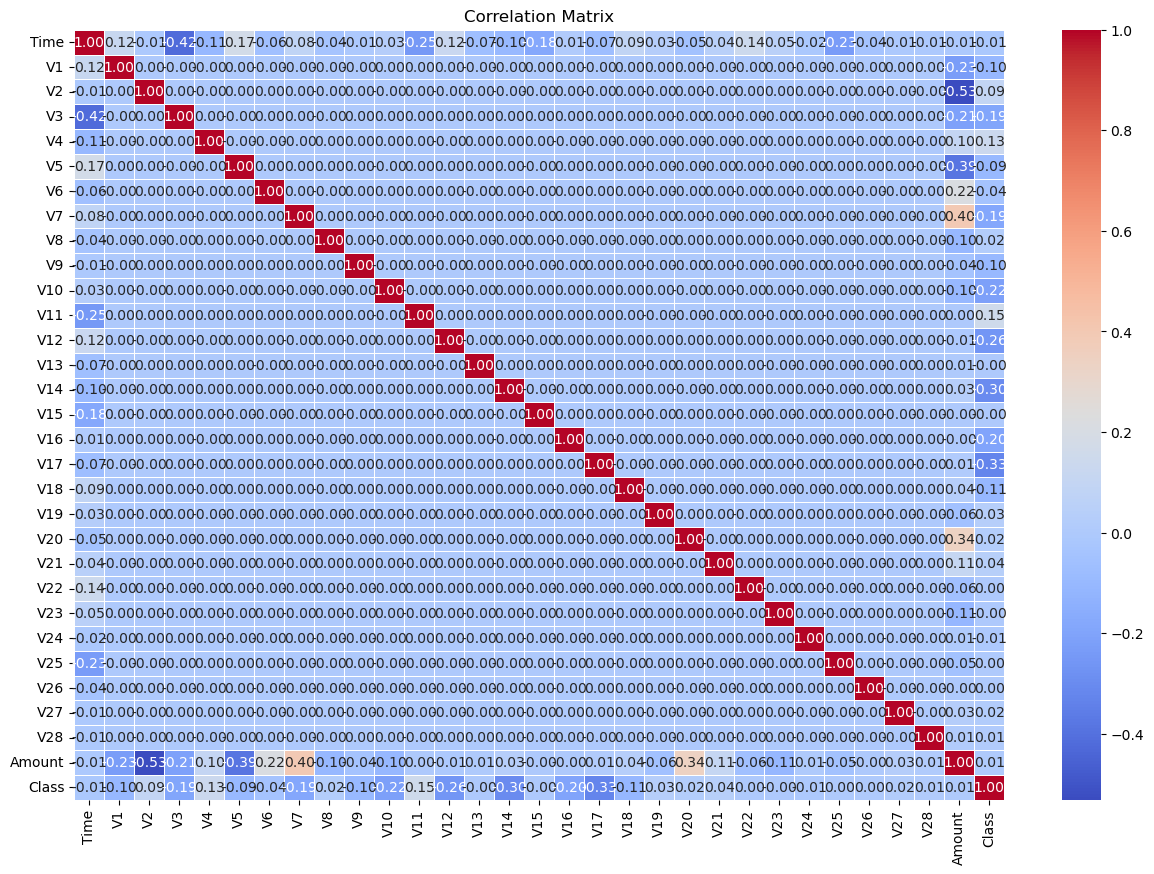

In [4]:
# Correlation Matrix to identify relationships between numeric features
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

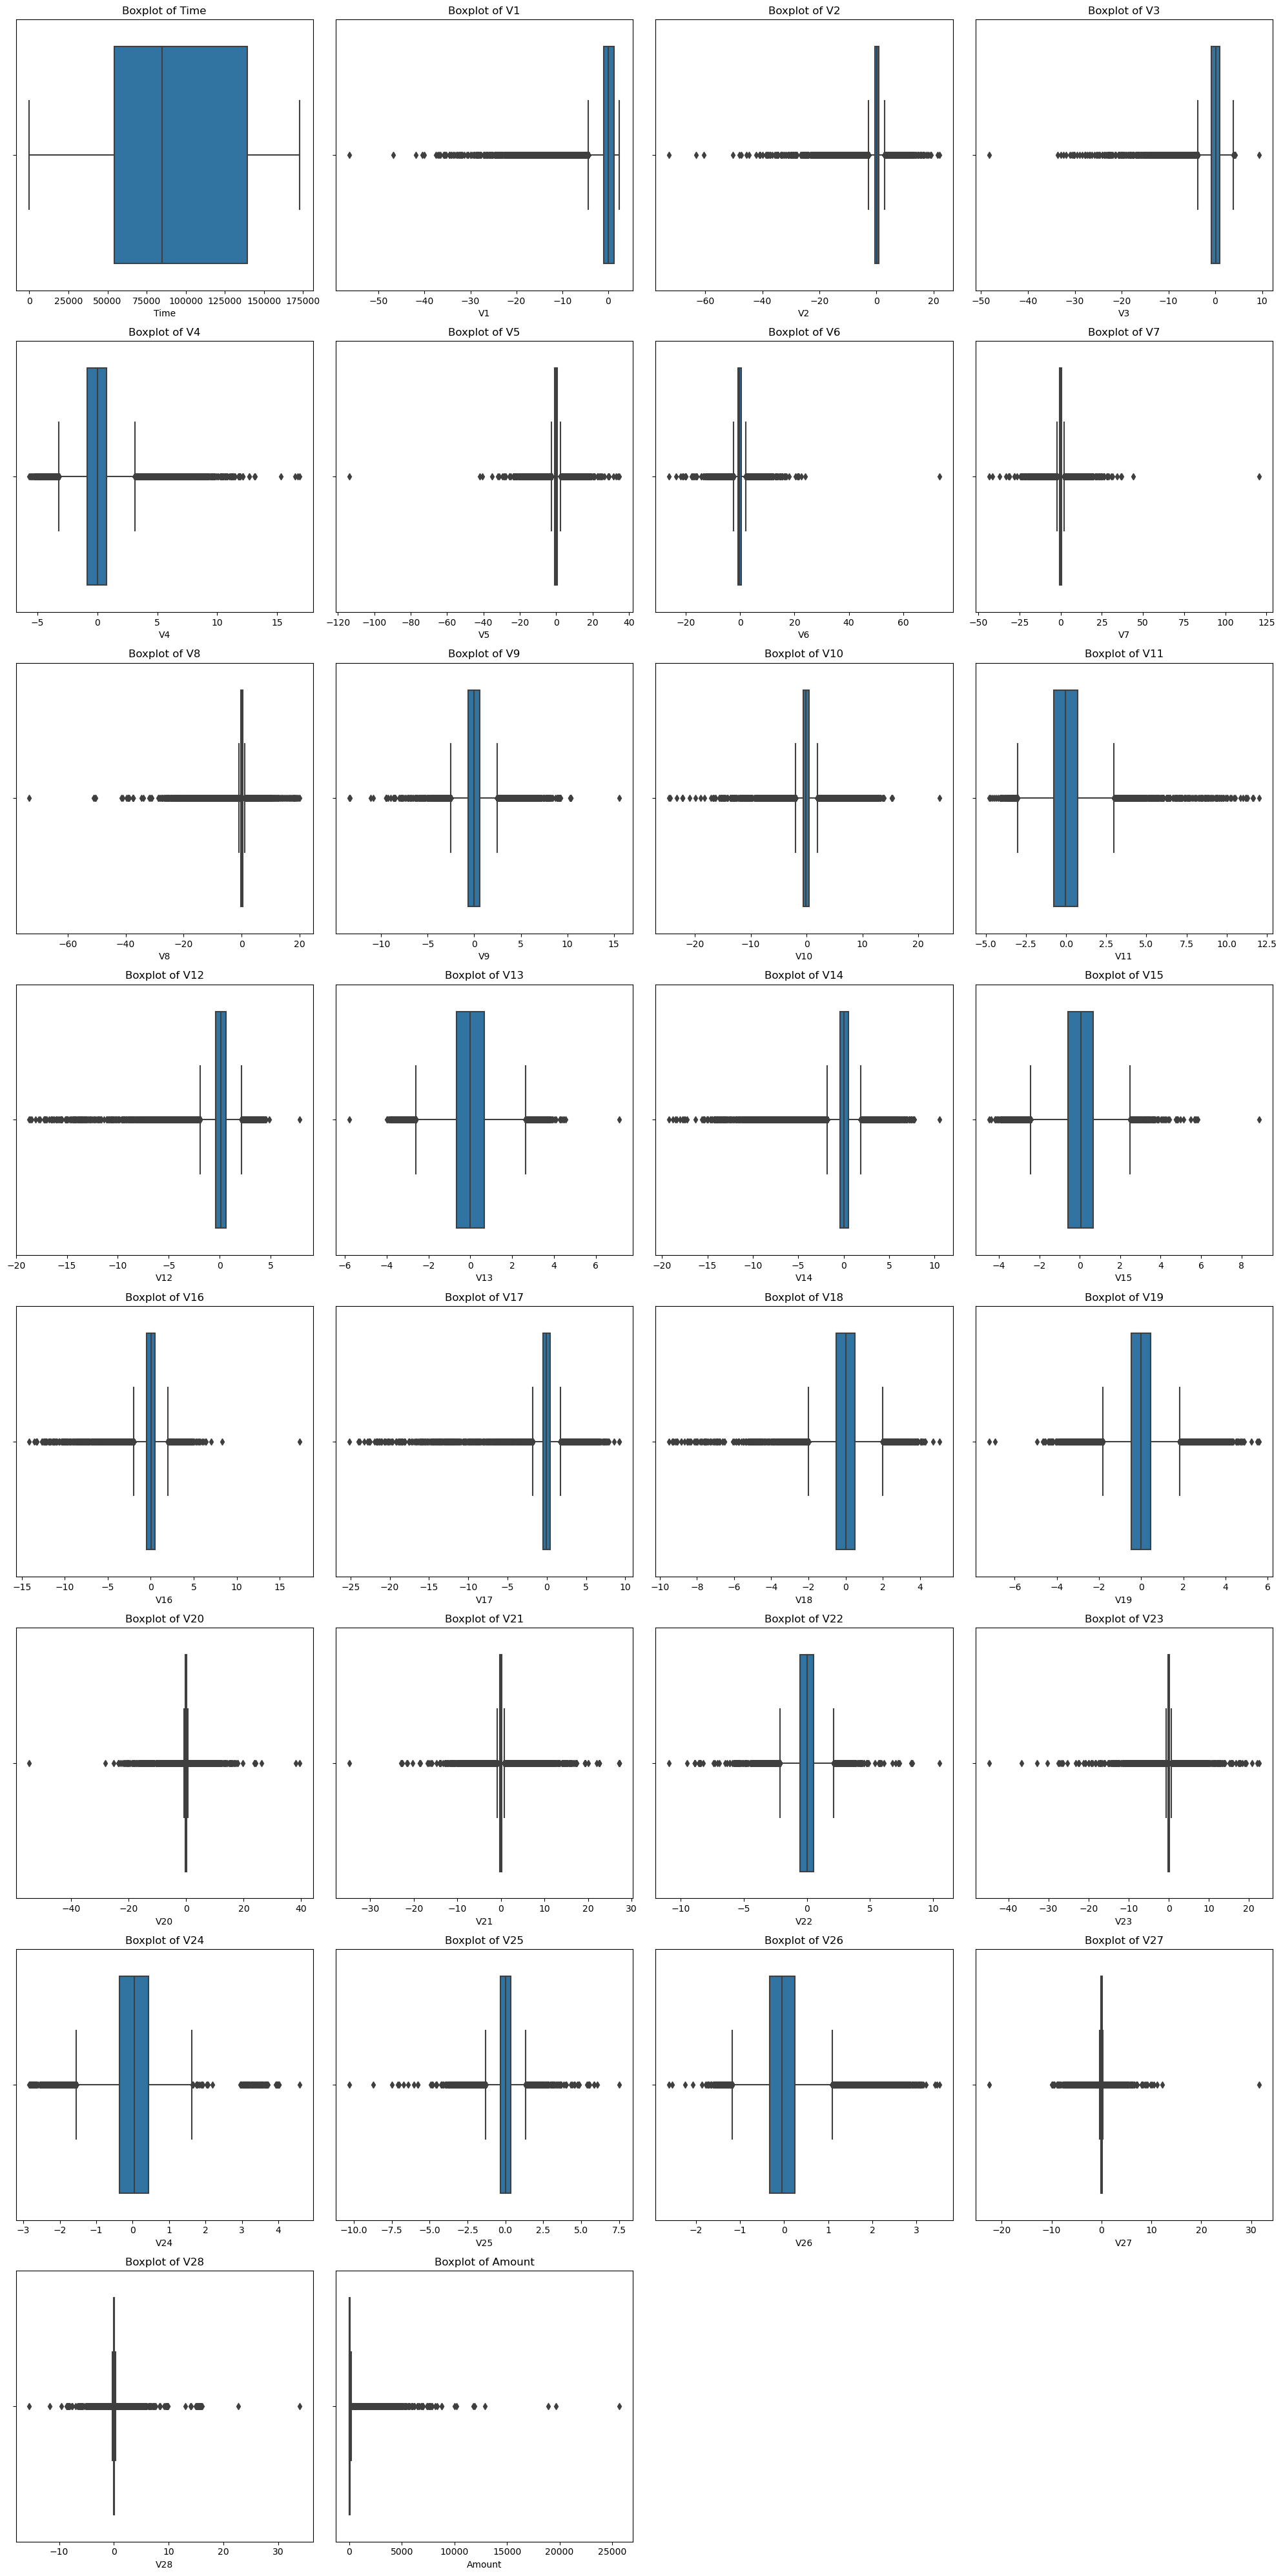

In [5]:
# Assuming `numerical_features` contains the list of numerical columns
# Adjusting the number of rows and columns dynamically
num_features = len(numerical_features)
cols = 4  # Set number of columns (you can adjust this)
rows = int(np.ceil(num_features / cols))  # Calculate required rows

# Plotting boxplots for all numerical features
plt.figure(figsize=(cols * 5, rows * 5))  # Adjust figure size based on grid
for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)  # Create subplot for each feature
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()  # Automatically adjust spacing
plt.show()

In [7]:
# Feature scaling (standardization) for logistic regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Class', axis=1))

# Convert scaled features back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features)
df_scaled['Class'] = df['Class']

C:\Users\Parisha Bansal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


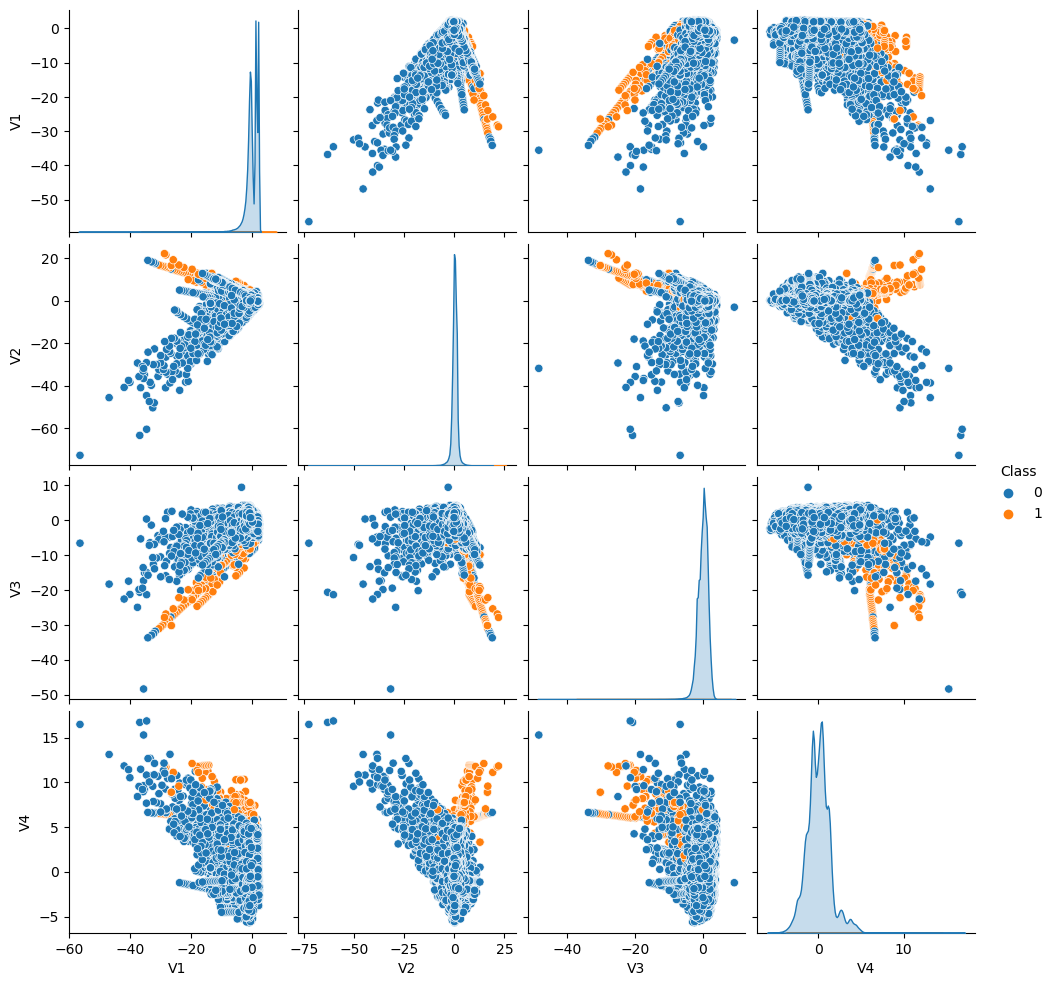

In [8]:
# Pair plot of a few features to check relationships
sns.pairplot(df, vars=['V1', 'V2', 'V3', 'V4'], hue='Class')
plt.show()

In [9]:
# Feature Selection: Removing the 'Time' column as it's not useful
df = df.drop('Time', axis=1)

In [10]:
# Data Preprocessing
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85295    12]
 [   50    86]]
AUC-ROC:  0.9804853611764843


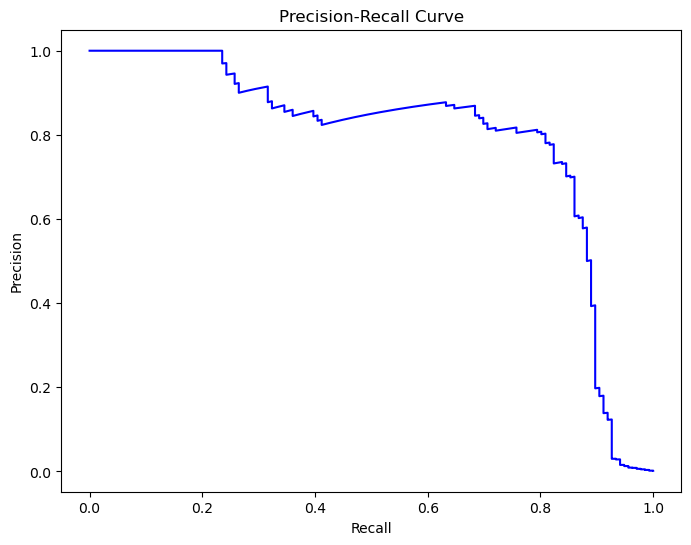

In [12]:
# Model Evaluation: Precision, Recall, AUC-ROC
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC: ", roc_auc)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()